In [26]:
 %matplotlib inline

import numpy as np 
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
#import sklearn.ensemble.RandomForestClassifier as RandomForestClassifier
import pandas as pd
import os 

np.random.seed(0)
torch.manual_seed(0)

In [7]:
train_data_directory = '50States10K'
test_data_directory = 'test_data'


dataset = datasets.ImageFolder(train_data_directory, transforms.Compose([transforms.ToTensor()]))
#train_dataset, val_dataset = torch.utils.data.random_split(dataset, )
train_dataset = dataset

validation_dataset = []

batch_size = 4
batch_size_big = 200

data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)
data_loader_big = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size_big)
data_loader_shuffled = torch.utils.data.DataLoader(train_dataset, batch_size = 200, shuffle=True)
validation_loader = []


In [85]:
def get_state_data_loader(state, batch_size=100):
    tot = len(train_dataset)
    c = train_dataset.class_to_idx [state]
    weights = [1e-4 if i // 10000 == c else 0 for i in range(tot)]
    sampler = torch.utils.data.WeightedRandomSampler(weights, batch_size)
    return  torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, sampler=sampler)
    
    

## Data Visualization

### Sample set of images
Here we see the four images for a random coordinate sampled from the dataset. The images appear in the order of camera rotation 0, 90, 180, and 270 degrees.

Sample Set of Images:


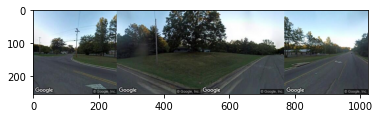

In [5]:
example_batch = next(iter(data_loader))[0]
stacked = example_batch[0]
for i in range(1, 4):
    stacked = torch.cat((stacked,example_batch[i]), 2)
print("Sample Set of Images:")
plt.imshow(stacked.permute(1, 2, 0))

### Sample image for each state

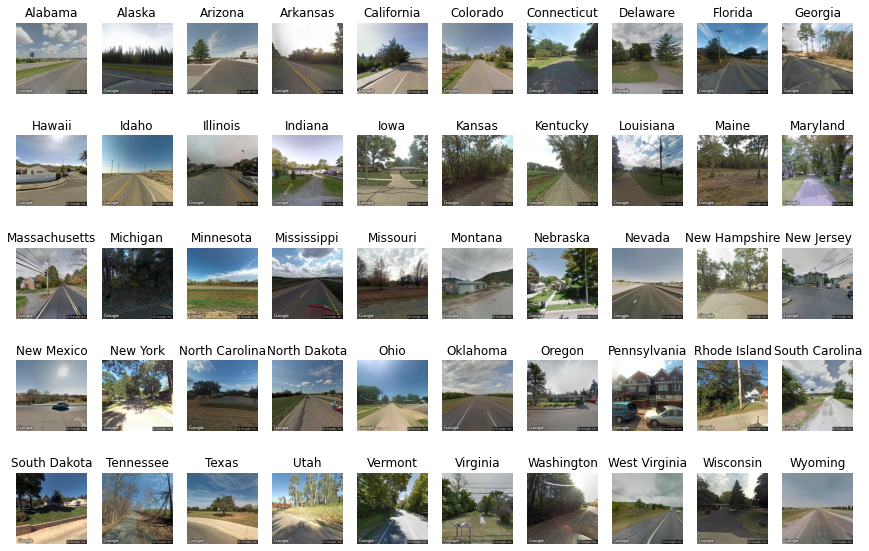

In [48]:
sample_50 = {}
for data, label in data_loader_shuffled:
    for d, l in zip(data, label):
        if l.item() in sample_50.keys():
            continue
        sample_50[l.item()] = d
    if (len(sample_50) == 50):
        break

fig, axs = plt.subplots(5, 10, figsize=(15,10))
for label, im in sorted(sample_50.items()):    
    #idx = np.unravel_index(label, shape) + 1
    #print(idx)
    ax = axs.flat[label] 
    #plt.subplot(shape[0], shape[1], label + 1)
    ax.set_title(train_dataset.classes[label])
    ax.imshow(im.permute(1, 2, 0))
    ax.axis('off')

### Average image and histogram by state 
In this section, we sample some random images for a given state, then average all of those images together and plot a histogram. We can see that for all states we tend towards an image with a gray bottom half and a bluish top half, indicating that our average image looks at the road with the sky above it. Sampling a smaller number of images is a little bit more informative; we can start to make out that more rural states tend to have more trees visible and urban states have more gray color overall.

In [91]:
def collect_state_data(desired_states, num = 100):
    results = {state: [] for state in desired_states }

    for state in desired_states:
        loader = get_state_data_loader(state, batch_size = num)
        for data, _ in loader:
            results[state].extend(data)
            
    return results

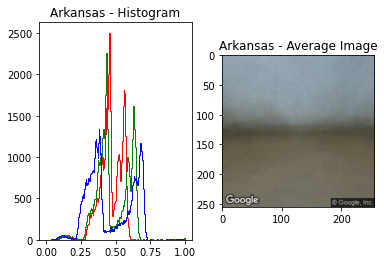

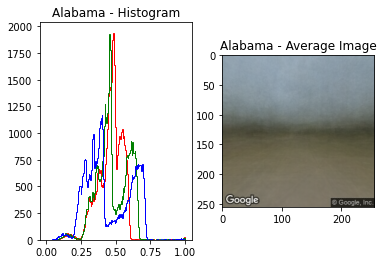

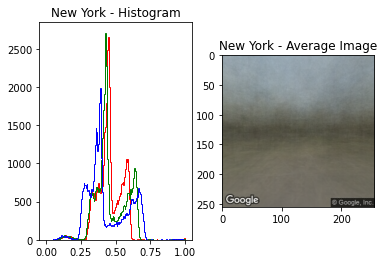

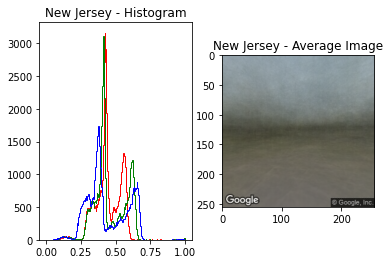

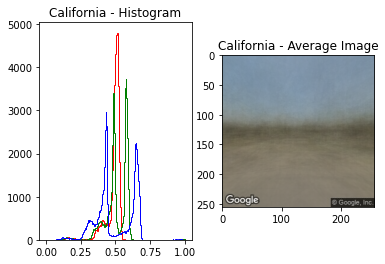

In [92]:
desired_states = ['Arkansas', 'Alabama', 'New York', 'New Jersey', 'California']
num_images = 100

state_data = collect_state_data(desired_states, num=num_images)
means = {}
colors = ['red', 'green', 'blue']

for state in desired_states:
    tens = torch.stack(state_data[state])
    mean = torch.mean(tens, dim=0).permute(1, 2, 0)
    fig = plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    plt.title('{} - Histogram'.format(state))
    for i in range(3):
        plt.hist(mean.numpy()[:, :, i].ravel(), bins=256, range=(0.0, 1.0), histtype='step', color=colors[i])
    
    fig.add_subplot(122)
    plt.title('{} - Average Image'.format(state))
    plt.imshow(mean)
    
    plt.show()

In [ ]:
dataframe = pd.DataFrame()

ctr = 0

# for data, label in data_loader:
#     num = data.numpy()
#     dataframe.append(num)
#     ctr += 1
#     if (ctr > 1000):
#         break
    #dataframe.insert()


In [50]:
#print(train_dataset.imgs[:1000])

[('50States10K\\Alabama\\2007_-NPWPMrYipeYcLsiZqKRyw_0.jpg', 0), ('50States10K\\Alabama\\2007_-NPWPMrYipeYcLsiZqKRyw_180.jpg', 0), ('50States10K\\Alabama\\2007_-NPWPMrYipeYcLsiZqKRyw_270.jpg', 0), ('50States10K\\Alabama\\2007_-NPWPMrYipeYcLsiZqKRyw_90.jpg', 0), ('50States10K\\Alabama\\2007_-QSgJSNZwW7XRIwKYhq8gg_0.jpg', 0), ('50States10K\\Alabama\\2007_-QSgJSNZwW7XRIwKYhq8gg_180.jpg', 0), ('50States10K\\Alabama\\2007_-QSgJSNZwW7XRIwKYhq8gg_270.jpg', 0), ('50States10K\\Alabama\\2007_-QSgJSNZwW7XRIwKYhq8gg_90.jpg', 0), ('50States10K\\Alabama\\2007_-VITZGSJ_ZcA7laIO6CX1A_0.jpg', 0), ('50States10K\\Alabama\\2007_-VITZGSJ_ZcA7laIO6CX1A_180.jpg', 0), ('50States10K\\Alabama\\2007_-VITZGSJ_ZcA7laIO6CX1A_270.jpg', 0), ('50States10K\\Alabama\\2007_-VITZGSJ_ZcA7laIO6CX1A_90.jpg', 0), ('50States10K\\Alabama\\2007_-fmQqiBVPCh6wsK4DXL5zg_0.jpg', 0), ('50States10K\\Alabama\\2007_-fmQqiBVPCh6wsK4DXL5zg_180.jpg', 0), ('50States10K\\Alabama\\2007_-fmQqiBVPCh6wsK4DXL5zg_270.jpg', 0), ('50States10K\\Alaba